In [1]:
!pwd
%config IPCompleter.greedy=True # コードを自動補完
import sys
sys.executable

/notebook


'/usr/local/bin/python3.7'

In [2]:
import pycaret

# Announcing PyCaret 1.0.0
- https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46

#### PyCaretは基本的に、scikit-learn、XGBoost、Microsoft LightGBM、spaCyなど、いくつかの機械学習ライブラリとフレームワークのPythonラッパー

#### PyCaretは、欠損値の補完、カテゴリカルデータの変換、機能エンジニアリング、さらにはハイパーパラメータの調整など、すべてを自動化する

#### 日本語でのチュートリアルは下記
- https://techtech-sorae.com/%e6%a9%9f%e6%a2%b0%e5%ad%a6%e7%bf%92%e3%81%ae%e8%87%aa%e5%8b%95%e5%8c%96%e3%83%a9%e3%82%a4%e3%83%96%e3%83%a9%e3%83%aa%e3%80%8cpycaret%e3%80%8d%e3%82%92%e4%bd%bf%e3%81%a3%e3%81%a6%e3%81%bf%e3%81%9f/

In [3]:
# 「糖尿病」データセット
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### データ前処理
- 青い枠にカーソルを移して空欄のまま”Enter”を押すと、自動的に前処理をPyCaretがやってくれて、無事に終了すると結果が表示されます。

In [4]:
# PyCaretでの機械学習実験の最初のステップは、
# 必要なモジュールをインポートしてsetup()を初期化することによって環境をセットアップする
# この例で使用されているモジュールはpycaret.classification
# missing欠損値代入、カテゴリ変数エンコーディング、ラベルエンコーディング（yesまたはnoを1または0に変換）、train-test-split
# などの機械学習に必須のデータ前処理ステップは、setup（）が初期化されるときに自動的に実行
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4517
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### モデル比較

In [5]:
# 教師あり機械学習実験（分類または回帰）で推奨される最初のステップ
# この関数は、モデルライブラリ内のすべてのモデルをトレーニングし、
# k分割交差検証（デフォルトでは10分割）を使用して一般的な評価指標を比較する
# トレーニングデータセットのみのk分割交差検証に基づいています（デフォルトでは70％）
# 分類：精度、AUC、リコール、精度、F1、カッパ
# 回帰の場合： MAE、MSE、RMSE、R2、RMSLE、MAPE
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.787600,0.826200,0.587100,0.756500,0.652500,0.504900
1,CatBoost Classifier,0.780300,0.830600,0.624000,0.715600,0.657500,0.498700
2,Ridge Classifier,0.778300,0.000000,0.587400,0.731300,0.646500,0.488600
3,Linear Discriminant Analysis,0.776500,0.827900,0.582200,0.731700,0.641800,0.483400
4,Random Forest Classifier,0.767100,0.816600,0.511700,0.745900,0.603700,0.446800
5,Extra Trees Classifier,0.766900,0.817800,0.564900,0.697500,0.617600,0.455900
6,Light Gradient Boosting Machine,0.758000,0.819800,0.608500,0.673600,0.631500,0.453400
7,Extreme Gradient Boosting,0.756100,0.831500,0.604400,0.664400,0.628900,0.448700
8,Gradient Boosting Classifier,0.746900,0.819600,0.578100,0.655600,0.607700,0.423800
9,Ada Boost Classifier,0.743000,0.810800,0.571600,0.650400,0.601600,0.414800


### モデル作成

In [6]:
# 文字列入力として渡されるモデル名を渡せばいい
# k分割交差検証スコアとトレーニング済みモデルオブジェクトを含むテーブルを返す
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7963,0.8211,0.7895,0.6818,0.7317,0.5689
1,0.8148,0.8466,0.6316,0.8000,0.7059,0.5735
2,0.6667,0.7729,0.5263,0.5263,0.5263,0.2692
3,0.8333,0.8977,0.7895,0.7500,0.7692,0.6389
4,0.7778,0.7955,0.6842,0.6842,0.6842,0.5128
5,0.7407,0.7835,0.5263,0.6667,0.5882,0.4028
6,0.8333,0.8647,0.7368,0.7778,0.7568,0.6301
7,0.7358,0.7984,0.3333,0.7500,0.4615,0.3193
8,0.8113,0.9190,0.6667,0.7500,0.7059,0.5677
9,0.7925,0.8063,0.5556,0.7692,0.6452,0.5038


In [7]:
# これはscikit-learn推定器なので、「.」でつなげばfeature_importances_とかとれる
print(catboost.feature_names_)
print(catboost.feature_importances_)

['Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)', 'Number of times pregnant_0', 'Number of times pregnant_1', 'Number of times pregnant_10', 'Number of times pregnant_11', 'Number of times pregnant_12', 'Number of times pregnant_13', 'Number of times pregnant_14', 'Number of times pregnant_15', 'Number of times pregnant_17', 'Number of times pregnant_2', 'Number of times pregnant_3', 'Number of times pregnant_4', 'Number of times pregnant_5', 'Number of times pregnant_6', 'Number of times pregnant_7', 'Number of times pregnant_8', 'Number of times pregnant_9']
[1.88576152e+01 9.56494908e+00 8.17573470e+00 5.91342184e+00
 1.76886293e+01 1.36807522e+01 1.59498354e+01 3.16448306e-01
 1.13001624e+00 5.13829561e-01 1.34549757e-01 4.69218783e-02
 2.10597957e-02 1.5456

### モデルチューニング

In [8]:
%%time
# 自動的に機械学習モデルのハイパーパラメータを調整する
# PyCaretは、事前定義された検索スペースでランダムグリッド検索を使用
# この関数は、k分割交差検証スコアとトレーニング済みモデルオブジェクトを含むテーブルを返す
tuned_catboost = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8148,0.8391,0.7368,0.7368,0.7368,0.5940
1,0.7593,0.8451,0.4737,0.7500,0.5806,0.4236
2,0.7222,0.7895,0.5263,0.6250,0.5714,0.3682
3,0.8148,0.9038,0.7368,0.7368,0.7368,0.5940
4,0.7963,0.8241,0.5789,0.7857,0.6667,0.5248
5,0.7222,0.8105,0.4737,0.6429,0.5455,0.3520
6,0.7778,0.8556,0.4737,0.8182,0.6000,0.4609
7,0.7358,0.8159,0.4444,0.6667,0.5333,0.3592
8,0.8302,0.9302,0.6667,0.8000,0.7273,0.6055
9,0.8302,0.8206,0.6111,0.8462,0.7097,0.5940


CPU times: user 1.98 s, sys: 542 ms, total: 2.52 s
Wall time: 15.8 s


### アンサンブルモデル

In [9]:
ridge = create_model('ridge')
lda = create_model('lda')
gbc = create_model('gbc')
xgboost = create_model('xgboost')
lgbm = create_model('lightgbm')
 
ensemble_clf = blend_models( [ ridge, lda, gbc, xgboost, lgbm] )

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.0,0.8421,0.7273,0.7805,0.6473
1,0.7778,0.0,0.5263,0.7692,0.6250,0.4749
2,0.6852,0.0,0.5263,0.5556,0.5405,0.3014
3,0.8519,0.0,0.7895,0.7895,0.7895,0.6752
4,0.7407,0.0,0.4737,0.6923,0.5625,0.3874
5,0.7222,0.0,0.5263,0.6250,0.5714,0.3682
6,0.8148,0.0,0.6316,0.8000,0.7059,0.5735
7,0.6981,0.0,0.3333,0.6000,0.4286,0.2456
8,0.8868,0.0,0.8333,0.8333,0.8333,0.7476
9,0.7547,0.0,0.5556,0.6667,0.6061,0.4301


### スタッキング

In [10]:
stacker = stack_models(estimator_list = [ridge,lda,xgboost], meta_model = lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.8541,0.7368,0.6364,0.6829,0.4906
1,0.7407,0.8241,0.5263,0.6667,0.5882,0.4028
2,0.6852,0.7669,0.5789,0.5500,0.5641,0.3180
3,0.7963,0.8722,0.7368,0.7000,0.7179,0.5587
4,0.7963,0.8165,0.6842,0.7222,0.7027,0.5479
5,0.7037,0.7594,0.5263,0.5882,0.5556,0.3344
6,0.8148,0.9053,0.6842,0.7647,0.7222,0.5840
7,0.7547,0.8063,0.5000,0.6923,0.5806,0.4136
8,0.8679,0.8937,0.8333,0.7895,0.8108,0.7095
9,0.7736,0.8302,0.5556,0.7143,0.6250,0.4664


### ビジュアライズ

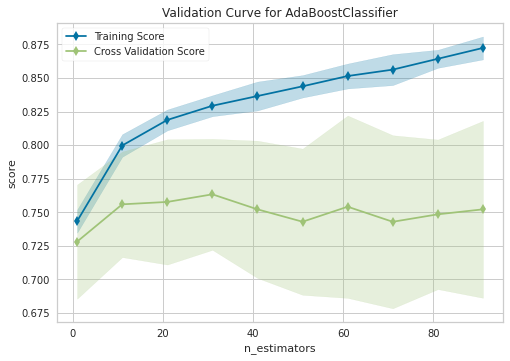

In [11]:
# create a model
adaboost = create_model('ada')

# AUC plot
plot_model(adaboost, plot = 'auc')

# Decision Boundary
plot_model(adaboost, plot = 'boundary')

# Precision Recall Curve
plot_model(adaboost, plot = 'pr')

# Validation Curve
plot_model(adaboost, plot = 'vc')

In [12]:
adaboost = create_model('ada')
evaluate_model(adaboost)

,Parameters
algorithm,SAMME.R
base_estimator,None
learning_rate,1
n_estimators,50
random_state,4517


### SHAPでツリーベースのモデル解釈
- LIMEとSHAPは、機械学習モデルがあるサンプルの予測についてどのような根拠でその予測を行ったかを解釈する
- SHAPツールから得られる情報はLIMEと似たような感じで特定サンプルの予測における各特徴量の寄与スコア

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7963,0.8301,0.7368,0.7000,0.7179,0.5587
1,0.7963,0.8602,0.5789,0.7857,0.6667,0.5248
2,0.6481,0.7880,0.4737,0.5000,0.4865,0.2192
3,0.8519,0.8932,0.8421,0.7619,0.8000,0.6828
4,0.7037,0.7910,0.4737,0.6000,0.5294,0.3175
5,0.6852,0.7639,0.5263,0.5556,0.5405,0.3014
6,0.7963,0.8812,0.5789,0.7857,0.6667,0.5248
7,0.7358,0.8032,0.5000,0.6429,0.5625,0.3775
8,0.8491,0.9222,0.8333,0.7500,0.7895,0.6723
9,0.6981,0.7825,0.5000,0.5625,0.5294,0.3083


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


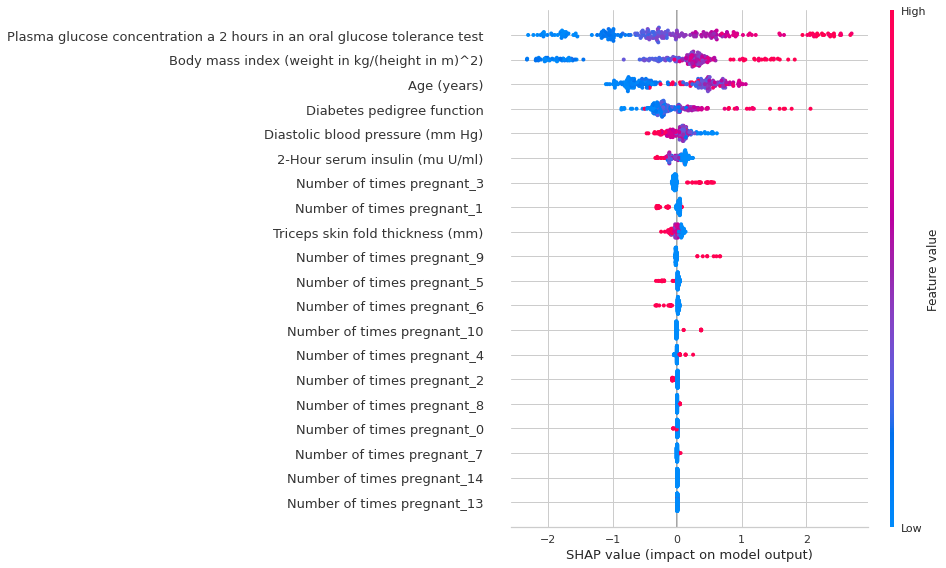

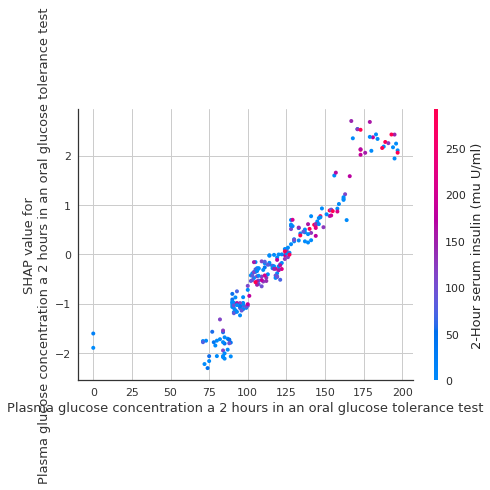

In [13]:
# create a model
xgboost = create_model('xgboost')
# summary plot
interpret_model(xgboost)
# correlation plot
interpret_model(xgboost, plot = 'correlation')

In [14]:
# テストデータセット内の特定のデータポイント（reason引数とも呼ばれる）の解釈は、
# 「reason」プロットを使用して評価できます。
# 以下の例では、テストデータセットの最初のインスタンスをチェックしています。
interpret_model(xgboost, plot='reason', observation=0) 

In [15]:
interpret_model(xgboost, plot='reason', observation=1) 

### モデル予測

In [16]:
# create a model
rf = create_model('rf')

# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.671,0.7358,0.4568,0.5362,0.4933,0.252


In [17]:
# predict_modelは実運用のtestセットで使われる
predictions = predict_model(rf, data=diabetes)

# 予測結果のLabel列とScore列ができる
predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0,0.2
2,8,183,64,0,0,23.3,0.672,32,1,0,0.5
3,1,89,66,23,94,28.1,0.167,21,0,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1,0.9
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.5
764,2,122,70,27,0,36.8,0.340,27,0,0,0.1
765,5,121,72,23,112,26.2,0.245,30,0,0,0.1
766,1,126,60,0,0,30.1,0.349,47,1,1,0.8


### モデルのデプロイ

In [18]:
## トレーニング済みモデルを含むパイプライン全体を、ノートブック環境からクラウドにデプロイできます
#deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws', 
#             authentication =  {'bucket'  : 'pycaret-test'})

### モデルの保存/実験の保存

In [19]:
# トレーニングが完了すると、
# すべての前処理変換とトレーニング済みのモデルオブジェクトを含むパイプライン全体を
# バイナリピクルファイルとして保存できます

# creating model
adaboost = create_model('ada')

# saving model(./ada_for_deployment.pklができる)
save_model(adaboost, model_name = 'ada_for_deployment')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7778,0.8150,0.6842,0.6842,0.6842,0.5128
1,0.7778,0.8316,0.5263,0.7692,0.6250,0.4749
2,0.6667,0.7323,0.4211,0.5333,0.4706,0.2322
3,0.8519,0.9098,0.8421,0.7619,0.8000,0.6828
4,0.6852,0.7940,0.5263,0.5556,0.5405,0.3014
5,0.7222,0.7624,0.6842,0.5909,0.6341,0.4122
6,0.7407,0.8195,0.4211,0.7273,0.5333,0.3710
7,0.7170,0.7778,0.4444,0.6154,0.5161,0.3234
8,0.7736,0.8683,0.6667,0.6667,0.6667,0.4952
9,0.7170,0.7968,0.5000,0.6000,0.5455,0.3424


Transformation Pipeline and Model Succesfully Saved


In [20]:
# load_modelでロードできる
load_model('ada_for_deployment')

Transformation Pipeline and Model Sucessfully Loaded


[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagori...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()),
                 ('dummy', Dummify(target='Class variable')),
                 ('fix_perfect', Remove_100(target='Class variable')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=4517)]

In [21]:
# すべての中間出力で構成される実験全体を1つのバイナリファイルとして保存することもできます
# (./my_first_experiment.pklができる)
save_experiment(experiment_name = 'my_first_experiment')

Experiment Succesfully Saved


In [22]:
# load_experimentでロードできる
load_experiment('my_first_experiment')

,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Compare Models Score Grid
7,CatBoost Classifier
8,CatBoost Classifier Score Grid
9,Tuned <catboost.core.CatBoostClassifier object...


[                      Description      Value
 0                      session_id       4517
 1                     Target Type     Binary
 2                   Label Encoded       None
 3                   Original Data   (768, 9)
 4                 Missing Values       False
 5               Numeric Features           7
 6           Categorical Features           1
 7               Ordinal Features       False
 8      High Cardinality Features       False
 9        High Cardinality Method        None
 10                   Sampled Data   (768, 9)
 11          Transformed Train Set  (537, 24)
 12           Transformed Test Set  (231, 24)
 13               Numeric Imputer        mean
 14           Categorical Imputer    constant
 15                     Normalize       False
 16              Normalize Method        None
 17                Transformation       False
 18         Transformation Method        None
 19                           PCA       False
 20                    PCA Method        None
 21                PCA Components        None
 22           Ignore Low Variance       False
 23           Combine Rare Levels       False
 24          Rare Level Threshold        None
 25               Numeric Binning       False
 26               Remove Outliers       False
 27            Outliers Threshold        None
 28      Remove Multicollinearity       False
 29   Multicollinearity Threshold        None
 30                    Clustering       False
 31          Clustering Iteration        None
 32           Polynomial Features       False
 33             Polynomial Degree        None
 34          Trignometry Features       False
 35          Polynomial Threshold        None
 36                Group Features       False
 37             Feature Selection       False
 38  Features Selection Threshold        None
 39           Feature Interaction       False
 40                 Feature Ratio       False
 41         Interaction Threshold        None,
      Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
 440                                              189.0                          
 546                                              187.0                          
 178                                              143.0                          
 251                                              129.0                          
 37                                               102.0                          
 ..                                                 ...                          
 453                                              119.0                          
 4                                                137.0                          
 661                                              199.0                          
 332                                              180.0                          
 225                                               87.0                          
 
      Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
 440                             104.0                              25.0   
 546                              76.0                              27.0   
 178                              78.0                               0.0   
 251                              84.0                               0.0   
 37                               76.0                              37.0   
 ..                                ...                               ...   
 453                               0.0                               0.0   
 4                                40.0                              35.0   
 661                              76.0                              43.0   
 332                               0.0                               0.0   
 225                              78.0                              27.0   
 
      2-Hour serum insulin (mu U/ml)  \
 440                             0.0   
 546                           207.0   
 